<h3 bold><strong>Необходимо</strong></h3>

провести анализ успешности прохождения ассесмента студентами по разным программам и институтам
<ul>
<li>рассчитать сколько студентов из каждого института прошло ассесментпо каждой программе (представить в виде таблицы, где строки - программы. столбцы - институты)</li>
<li>рассчитать, сколько студентов ошибочно прошли ассесмент не только по своей программе</li>
<li>рассчитать, сколько студентов не указали СНИЛС (или он не был выгружен с платформы)</li>
</ul>

Импортируем необходимые библиотеки

In [48]:
import pandas as pd
import numpy as np


Прочитаем эксель файл с данными

In [49]:
assesment_df = pd.read_excel('data.xlsx', sheet_name='получено с площадки ассесмента')
our_df = pd.read_excel('data.xlsx', sheet_name='Наши списки')


Посмотрим на отсутствующие значения

In [50]:
assesment_df.isna().sum()


ID пользователя                                     0
СНИЛС                                             769
Дата регистрации                                    0
Состояние                                           0
Наименование курса                                  0
Отраслевая принадлежность                           0
Обучающиеся направления                             0
Этап ассесмента                                     0
СНИЛС+ Курс                                         0
Статус                                              0
Дата прохождения ассесмента                      1327
Наименование компетенции                            0
Итоговый уровень сформированности компетенций    1327
Итоговый уровень развития компетенции            1327
Время прохождения компетенции                    1327
Результат                                        1327
dtype: int64

In [51]:
our_df.isna().sum()


СНИЛС           0
программа       0
Институт        0
СНИЛС + Курс    0
dtype: int64

Удалим отсутствующие значения

In [52]:
assesment_df = assesment_df.dropna()
our_df = our_df.dropna()


По условиям задачи нужно удалить зарегистрировавшихся не в 2023 году

In [53]:
def is_this_year(x, year : str):
    if x[-4:] == year:
        return True
    return False

counter = lambda x: len(assesment_df) - np.vectorize(is_this_year)(assesment_df[x], '2023').sum()
print(counter('Дата регистрации'))
print(counter('Дата прохождения ассесмента'))


97
0


Нас интересуют только те кто завершил ассестмент, поэтому удалим ненужных

In [55]:
assesment_df = assesment_df[assesment_df['Статус'] == 'Завершено']


И не забудем удалить людей не из нужного нам года

In [56]:
assesment_df = assesment_df[np.vectorize(is_this_year)(assesment_df['Дата регистрации'], '2023')]
assesment_df['Статус'].value_counts()


Статус
Завершено    8556
Name: count, dtype: int64

In [57]:
merged_df = our_df.merge(assesment_df, how='left', on=['СНИЛС', 'СНИЛС'])
merged_df.head()


,СНИЛС,программа,Институт,СНИЛС + Курс,ID пользователя,Дата регистрации,Состояние,Наименование курса,Отраслевая принадлежность,Обучающиеся направления,Этап ассесмента,СНИЛС+ Курс,Статус,Дата прохождения ассесмента,Наименование компетенции,Итоговый уровень сформированности компетенций,Итоговый уровень развития компетенции,Время прохождения компетенции,Результат
0,868-826-620 84,1С-разработчик,ЕН,868-826-620 842023 1С-разработчик,6536596d22f275d6766f5ec9,23/10/2023,Активен,2023 1С-разработчик,Информационно-коммуникационные технологии,Не IT,1.0,868-826-620 842023 1С-разработчик,Завершено,31/10/2023,Дорабатывает конфигурации и модули ИС (информа...,Минимальный исходный,Не достигнут,42.0,0.181818
1,868-826-620 84,1С-разработчик,ЕН,868-826-620 842023 1С-разработчик,6536596d22f275d6766f5ec9,23/10/2023,Активен,2023 1С-разработчик,Информационно-коммуникационные технологии,Не IT,1.0,868-826-620 842023 1С-разработчик,Завершено,31/10/2023,Применяет языки программирования для решения п...,Базовый,Достигнут,43.0,0.401515
2,868-826-620 84,1С-разработчик,ЕН,868-826-620 842023 1С-разработчик,6536596d22f275d6766f5ec9,23/10/2023,Активен,2023 1С-разработчик,Информационно-коммуникационные технологии,Не IT,1.0,868-826-620 842023 1С-разработчик,Завершено,31/10/2023,Применяет интегрированные среды разработки (IDE),Минимальный исходный,Не достигнут,43.0,0.287879
3,862-422-622 26,1С-разработчик,ЕН,862-422-622 262023 1С-разработчик,653659c122f275d6766f5ef3,23/10/2023,Активен,2023 1С-разработчик,Информационно-коммуникационные технологии,Не IT,1.0,862-422-622 262023 1С-разработчик,Завершено,05/11/2023,Дорабатывает конфигурации и модули ИС (информа...,Базовый,Достигнут,39.0,0.356061
4,862-422-622 26,1С-разработчик,ЕН,862-422-622 262023 1С-разработчик,653659c122f275d6766f5ef3,23/10/2023,Активен,2023 1С-разработчик,Информационно-коммуникационные технологии,Не IT,1.0,862-422-622 262023 1С-разработчик,Завершено,05/11/2023,Применяет языки программирования для решения п...,Продвинутый,Превышен,39.0,0.568182


In [58]:
merged_df.isna().sum()


СНИЛС                                              0
программа                                          0
Институт                                           0
СНИЛС + Курс                                       0
ID пользователя                                  306
Дата регистрации                                 306
Состояние                                        306
Наименование курса                               306
Отраслевая принадлежность                        306
Обучающиеся направления                          306
Этап ассесмента                                  306
СНИЛС+ Курс                                      306
Статус                                           306
Дата прохождения ассесмента                      306
Наименование компетенции                         306
Итоговый уровень сформированности компетенций    306
Итоговый уровень развития компетенции            306
Время прохождения компетенции                    306
Результат                                     

In [91]:
result = merged_df.isna().sum()['ID пользователя']


#выведем вычисляемую ячейку
from IPython.display import Markdown as md
md(f"<p style='font-size:25px'>Также, из этого можно сделать вывод<br> что <strong>{result}</strong> студентов не указали свой СНИЛС при ассесменте</p>")


<p style='font-size:25px'>Также, из этого можно сделать вывод<br> что <strong>306</strong> студентов не указали свой СНИЛС при ассесменте</p>

Таким образом мы выполнили <strong>третье</strong> наше задание

Так как мы делали левый джоин, это значит следующее:
<br>Те поля, которые имеют NULL, не нашли соответствий в данных ассесмента. Соответственнно, их можно спокойно удалить

In [93]:
merged_df = merged_df.dropna()


Посмотрим какие ассесменты проходили студенты разных институтов

In [126]:
institues = merged_df[['Институт', 'Наименование курса']].groupby(by=['Институт', 'Наименование курса']).value_counts()
institues_df = pd.DataFrame(institues)
institues_df.head(10)


count
Институт Наименование курса                                       
ЕН       2023 1С-разработчик                                     6
         2023 Программирование на языке Python                  75
         2023 Специалист по веб-разработке и дизайну           150
         2023 Специалист по работе с базами данных              27
         2023 Цифровое обеспечение бизнес-аналитики             48
ИВТС     2023 1С-разработчик                                    72
         2023 DevOps-инженер                                    24
         2023 Автоматизированные системы технологической...    105
         2023 Аналитика данных                                 250
         2023 Микропроцессорные системы обработки информ...     40

С этими данными не совсем удобно работать, приведём их к более понятному виду

Так как мы работаем с мульти индексом, чтобы получить результаты студентов отдельного института, нам потребуется следующая команда

In [72]:
institues_df.loc['ЕН'].to_dict()['count']


{'2023 1С-разработчик': 6,
 '2023 Программирование на языке Python': 75,
 '2023 Специалист по веб-разработке и дизайну': 150,
 '2023 Специалист по работе с базами данных': 27,
 '2023 Цифровое обеспечение бизнес-аналитики': 48}

Теперь выполним её для студентов всех курсов

In [73]:
index = institues_df.reset_index()['Институт'].drop_duplicates().to_list()

data = {}
for name in index:
    data[name] = institues_df.loc[name].to_dict()['count']

data


{'ЕН': {'2023 1С-разработчик': 6,
  '2023 Программирование на языке Python': 75,
  '2023 Специалист по веб-разработке и дизайну': 150,
  '2023 Специалист по работе с базами данных': 27,
  '2023 Цифровое обеспечение бизнес-аналитики': 48},
 'ИВТС': {'2023 1С-разработчик': 72,
  '2023 DevOps-инженер': 24,
  '2023 Автоматизированные системы технологической подготовки производства - CAD/CAM/CAE': 105,
  '2023 Аналитика данных': 250,
  '2023 Микропроцессорные системы обработки информации и управления': 40,
  '2023 Программирование контроллеров промышленной автоматики': 57,
  '2023 Программирование на языке Python': 180,
  '2023 Разработчик мобильных и веб-приложений': 290,
  '2023 Специалист по веб-разработке и дизайну': 300,
  '2023 Специалист по работе с базами данных': 57,
  '2023 Специалист по тестированию в области информационных технологий': 96,
  '2023 Цифровое обеспечение бизнес-аналитики': 52},
 'ИГДИС': {'2023 1С-разработчик': 84,
  '2023 Информационно-аналитические технологии в ю

Из этих данных создадим датафрейм и привидём его к красивому состоянию

In [74]:
table = pd.DataFrame(data)


In [75]:
table


,ЕН,ИВТС,ИГДИС,ИГСН,ИПМКН,ИПУ,ИПФКСИТ,МИ,ПТИ,СО
2023 1С-разработчик,6.0,72.0,84.0,42.0,NaN,54.0,12.0,NaN,15.0,3.0
2023 Программирование на языке Python,75.0,180.0,120.0,150.0,NaN,25.0,10.0,NaN,35.0,15.0
2023 Специалист по веб-разработке и дизайну,150.0,300.0,615.0,745.0,10.0,330.0,245.0,5.0,115.0,NaN
2023 Специалист по работе с базами данных,27.0,57.0,9.0,15.0,NaN,6.0,3.0,6.0,6.0,6.0
2023 Цифровое обеспечение бизнес-аналитики,48.0,52.0,108.0,96.0,NaN,208.0,60.0,NaN,16.0,NaN
2023 DevOps-инженер,NaN,24.0,NaN,NaN,90.0,NaN,NaN,NaN,30.0,NaN
2023 Автоматизированные системы технологической подготовки производства - CAD/CAM/CAE,NaN,105.0,NaN,NaN,NaN,NaN,NaN,NaN,69.0,NaN
2023 Аналитика данных,NaN,250.0,NaN,NaN,370.0,NaN,NaN,NaN,135.0,NaN
2023 Микропроцессорные системы обработки информации и управления,NaN,40.0,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN
2023 Программирование контроллеров промышленной автоматики,NaN,57.0,NaN,NaN,6.0,NaN,NaN,NaN,96.0,NaN


In [76]:
table = table.fillna(0)
table = table.astype(int)


In [68]:
table


,ЕН,ИВТС,ИГДИС,ИГСН,ИПМКН,ИПУ,ИПФКСИТ,МИ,ПТИ,СО
2023 1С-разработчик,6,72,84,42,0,54,12,0,15,3
2023 Программирование на языке Python,75,180,120,150,0,25,10,0,35,15
2023 Специалист по веб-разработке и дизайну,150,300,615,745,10,330,245,5,115,0
2023 Специалист по работе с базами данных,27,57,9,15,0,6,3,6,6,6
2023 Цифровое обеспечение бизнес-аналитики,48,52,108,96,0,208,60,0,16,0
2023 DevOps-инженер,0,24,0,0,90,0,0,0,30,0
2023 Автоматизированные системы технологической подготовки производства - CAD/CAM/CAE,0,105,0,0,0,0,0,0,69,0
2023 Аналитика данных,0,250,0,0,370,0,0,0,135,0
2023 Микропроцессорные системы обработки информации и управления,0,40,0,0,12,0,0,0,0,0
2023 Программирование контроллеров промышленной автоматики,0,57,0,0,6,0,0,0,96,0


И наконец построим тепловую карту, но так как разброс данных слишком большой, лучше построим её в логарифмическом масштабе

<AxesSubplot: >

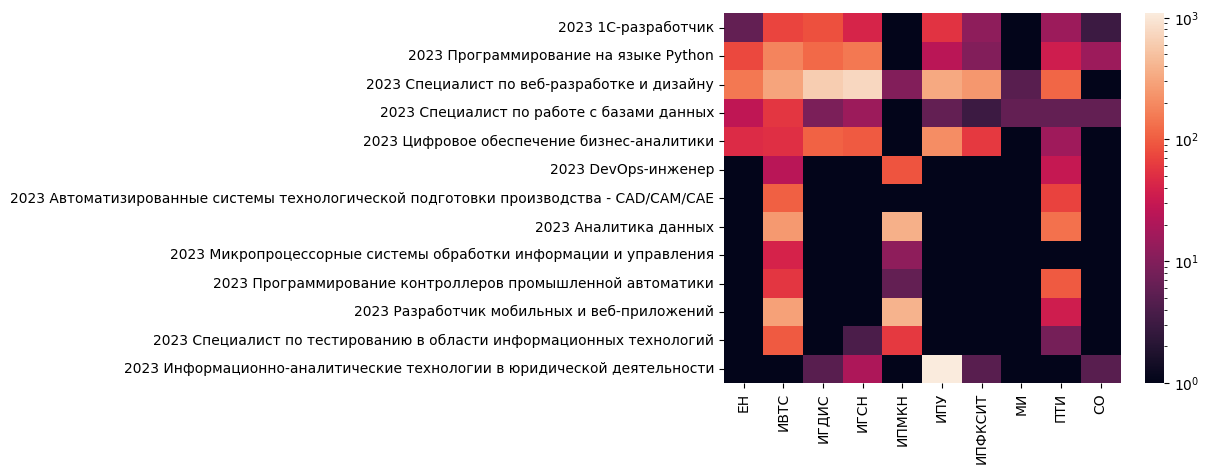

In [96]:
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize

sns.heatmap(table.replace(0, 1), norm=LogNorm()) #replace(0, 1) необходмс, так как у нас много 0 значений, а log(0) не существует


Таким образом мы выполнили <strong>второе</strong> наше задание

Чтобы посчитать количество людей прошедших <strong>не только свой</strong> ассестмент, нам потребуется узнать тех, кто прошёл <strong>свой</strong> ассестмент

In [104]:
complited_their_course = merged_df[merged_df['Наименование курса'] == '2023 ' + merged_df['программа']]['СНИЛС']


In [123]:
solved_tests = merged_df[merged_df['СНИЛС'].isin(complited_their_course)][['СНИЛС', 'Наименование курса']].groupby(['СНИЛС']).nunique().reset_index()
solved_tests.head(10)


,СНИЛС,Наименование курса
0,066-448-026 20,1
1,088-628-448 20,1
2,200-002-206 22,1
3,200-602-624 28,1
4,200-644-208 86,1
5,200-682-046 86,1
6,200-820-224 88,1
7,202-028-008 80,1
8,202-060-646 60,1
9,202-084-686 22,1


In [135]:
result = len(solved_tests[solved_tests['Наименование курса'] > 1])
md(f"<p style='font-size:25px'>Итого имеем, что <strong>{result}</strong> студента прошли не только свой тест</p>")


<p style='font-size:25px'>Итого имеем, что <strong>42</strong> студента прошли не только свой тест</p>